In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Биннинг

Оптимальный способ представления данных зависит не только от содержательного смысла данных, но и от вида используемой модели. Линейные модели и модели на основе дерева (например, деревья решений, градиентный бустинг деревьев решений и случайный лес), представляющие собой две большие и наиболее часто используемые группы методов, сильно отличаются друг от друга с точки зрения обработки признаков различных типов. 
Как вам известно, линейные модели могут моделировать только линейные зависимости, которые представляют собой линии в случае одного признака. Дерево решений может построить гораздо более сложную модель данных. Результаты сильно зависят от представления данных. Одним из способов повысить прогнозную силу линейных моделей при работе с непрерывными данными является биннинг характеристик (binning), который разбивает исходный признак на несколько категорий. 

Представим, что диапазон значений входного признака (в данном случае от -3 до 3) разбит на определенное количество категорий или бинов (bins – дословно «хранилище»), допустим, на 10 категорий. Точка данных будет представлена категорией, в которую она попадает. Сначала мы должны задать категории. В данном случае мы зададим 10 категорий, равномерно распределенных между -3 и 3. Для этого мы используем функцию np.linspace, создаем 11 элементов, которые дадут 10 категорий – интервалов, ограниченных двумя границами:

In [3]:
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

Визуализируем данное разбиение.
Для вычисления координат вертикальных линий разбиения на рисунке используется библиотека <code>KBinsDiscretizer</code> аргумент <code>n_bins</code> указывает количество разбиений. В результате получим следующий рисунок

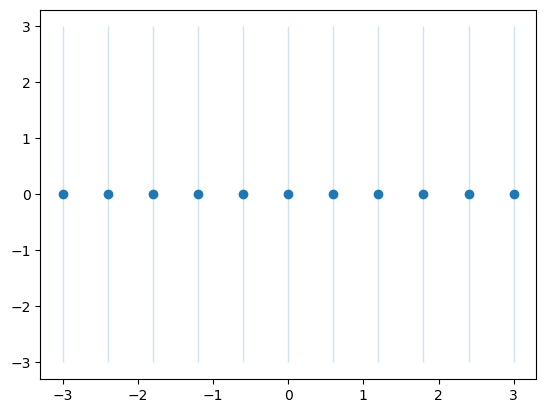

In [4]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10)
X_bins = kb.fit_transform(bins.reshape(-1, 1))# Очень важно из строки в столбик !!!
plt.plot(bins, np.zeros(len(bins)), 'o' );
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2);

Обратите внимание, что мы переводим список в матрицу столебец, используя  <code>reshape(-1, 1)</code>, иначе будет ошибка. Дискретизация работает только с матричными данными. Будьте внимательными!
Ниже приведено пояснение по преобразованию столбик - строка:

In [5]:
display ( bins)
display ( bins.reshape(-1, 1))

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

array([[-3. ],
       [-2.4],
       [-1.8],
       [-1.2],
       [-0.6],
       [ 0. ],
       [ 0.6],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 3. ]])

Теперь возьмем 100 случайных точек на оси X в интервале [-3,3], разобьем их на 10 одинаковых интервалов и подсчитам количество точек попавших в каждый интервал.

In [6]:
rnd = np.random.RandomState(42) # фиксанули случайные числа
X = rnd.uniform(-3, 3, size= 100).reshape(-1, 1) # сразу перестроили в матрицу столбец
#display (X) # исходные точки
kb = KBinsDiscretizer(n_bins=10) # фиксанули 10 интервалов разбиения
X_bins = kb.fit_transform(X)
#display (kb.bin_edges_ ) # линии(точки)разбиения

Посмотрим первые 5 исходных чисел до преобразования:

In [7]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

Посмотрим какие категории присвоены каждому числу (тоесть в какой отрезок данное число попало).

Внимание!!! Результат выводится в виде разраженной матрицы, так как по умолчанию используются категориальные переменные для указания отрезка присвоения (и это правильно с точки зрения машинного обучения, но не удобно для визуализации)

In [8]:
X_bins[:5]

<5x10 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [9]:
X_bins[:5].toarray()

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

По умолчанию стоит <code>encode='onehot'</code>, но если хотим сраху получить результат в неразряженном виде <code>encode='onehot-dense'</code>

Поправим код, чтобы указывался номер интервала, а не категория интервала.

In [10]:
rnd = np.random.RandomState(42) 
X = rnd.uniform(-3, 3, size= 100).reshape(-1, 1) 
kb = KBinsDiscretizer(n_bins=10, encode='ordinal') # добавили encode='ordinal'
X_bins = kb.fit_transform(X)

In [11]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [12]:
X_bins[:5]

array([[4.],
       [9.],
       [7.],
       [6.],
       [2.]])

In [13]:
pd.Series(X_bins.flatten()).value_counts()

4.0    10
9.0    10
7.0    10
6.0    10
2.0    10
1.0    10
0.0    10
8.0    10
3.0    10
5.0    10
Name: count, dtype: int64

Визуализируем результат:

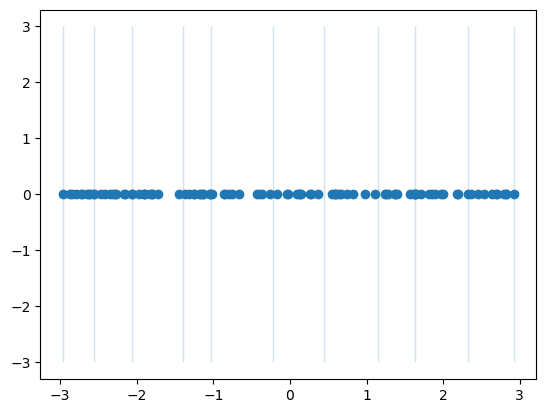

In [14]:
plt.plot(X, np.zeros(len(X)), 'o' );
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2);

Упс, а почему у нас интервалы не одинаковые? Если посмотреть ранее, то мы видим, что в каждый отрезок легло равное число случаных точек. Если интервалы были бы равные, этого не произошло. Причина в том, что по умолчанию стоит квантильное разбиение интервалов - в каждый интервал одинаковое число объектов.

Давайте это изменим, сделаем интервалы одинаковыми

1.0    15
0.0    13
3.0    12
7.0    12
9.0    10
6.0     9
8.0     8
5.0     8
4.0     7
2.0     6
Name: count, dtype: int64

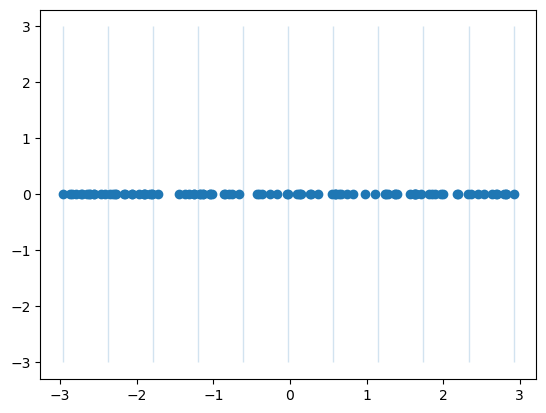

In [15]:
rnd = np.random.RandomState(42) 
X = rnd.uniform(-3, 3, size= 100).reshape(-1, 1) 
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') # добавили strategy='uniform', по умолчанию была квантильная
X_bins = kb.fit_transform(X)
plt.plot(X, np.zeros(len(X)), 'o' );
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2);

display(pd.Series(X_bins.flatten()).value_counts()) 

## Применение биннинга в моделях

Сгенерируем данные на основе растушего синусоидального тренда с шумом. Попробуем его описать с помощью различных моделей и даже оценить предсказательную силу наших моделей.

Создадим базовую кривую.

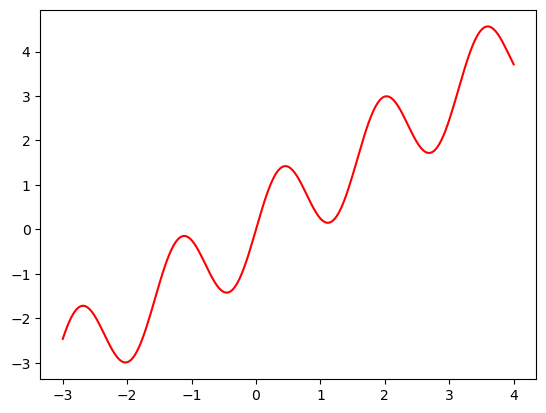

In [16]:
def make_sin(n_samples=100):
    x = np.linspace(-3, 4, n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    return x.reshape(-1, 1), y_no_noise

X, y = make_sin(n_samples=200)

plt.plot(X[:, 0], y, c='r');

Создадим кривую с шумом d bynthdfkt [-3,3], а интервал [3,4] оставим для предсказаний и визуализируем их совместно. 

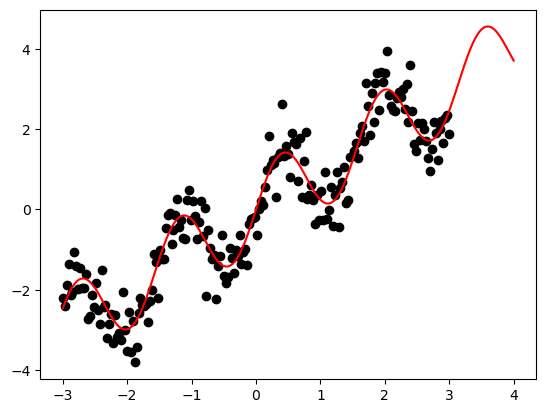

In [17]:
def make_wave(n_samples=100, k = 0.5):
    rnd = np.random.RandomState(42)
    x = np.linspace(-3, 3, n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + k* rnd.normal(size=len(x)))
    return x.reshape(-1, 1), y

X_orig, y_orig = make_sin(n_samples=200)
X, y = make_wave(n_samples=200)

plt.plot(X[:, 0], y, 'o', c='k' );
plt.plot(X_orig[:, 0], y_orig, c='r' );

### Регрессия внутри биннинга
Давайте попробуем посчитать регрессии внутри каждого диапазона (бинна). и соединим их между собой

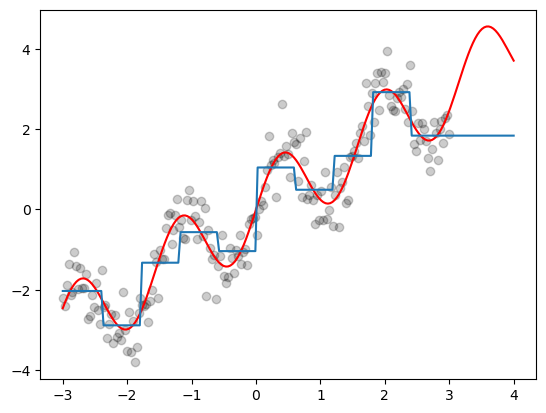

In [18]:
from sklearn.linear_model import LinearRegression
X, y = make_wave(n_samples=200)
X_orig, y_orig = make_sin(n_samples=200)

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
X_binned = kb.transform(X)

reg = LinearRegression().fit(X_binned, y)

line = np.linspace(-3, 4, 200).reshape(-1,1)
line_pred = kb.transform(line)



plt.plot(X[:, 0], y, 'o', c='k',alpha=.2 );
plt.plot(X_orig[:, 0], y_orig, c='r' );
plt.plot(line, reg.predict(line_pred), label='g');

### Регрессия внутри биннинга с направлением
Свяжем пременную и номер бинна, и раситаем регрессию уже на большем количестве переменных.

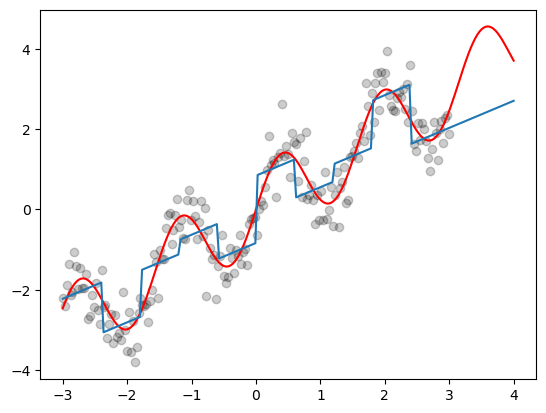

In [19]:
from sklearn.linear_model import LinearRegression
X, y = make_wave(n_samples=200)
X_orig, y_orig = make_sin(n_samples=200)

kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

X_combined = np.hstack([X, X_binned]) # Добавим направленность внутри бина

reg = LinearRegression().fit(X_combined, y)

line = np.linspace(-3, 4, 200).reshape(-1,1)
line_binned = kb.transform(line)

line_combined = np.hstack([line, line_binned])
line_pred = reg.predict(line_combined)



plt.plot(X[:, 0], y, 'o', c='k',alpha=.2 );
plt.plot(X_orig[:, 0], y_orig, c='r' );

plt.plot(line, line_pred, label='g');

In [21]:
pd.DataFrame(X_combined)

,0,1,2,3,4,5,6,7,8,9,10
0,-3.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.969849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.939698,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.909548,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.879397,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,2.879397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,2.909548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,2.939698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,2.969849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Регрессия внутри биннинга с направлением и связью с бином
Свяжем пременную и произведение прееномер бинна, и раситаем решрессию уже на большем количестве переменных.

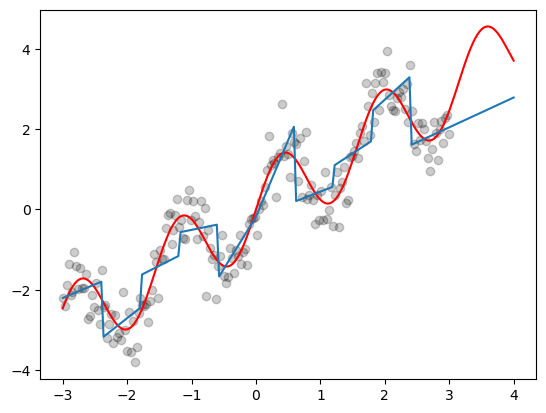

In [23]:
from sklearn.linear_model import LinearRegression
X, y = make_wave(n_samples=200)
X_orig, y_orig = make_sin(n_samples=200)

kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

X_combined = np.hstack([X, X*X_binned]) # Свяжем X и номер бина

reg = LinearRegression().fit(X_combined, y)

line = np.linspace(-3, 4, 200).reshape(-1,1)
line_binned = kb.transform(line)

line_combined = np.hstack([line, line * line_binned])
line_pred = reg.predict(line_combined)



plt.plot(X[:, 0], y, 'o', c='k',alpha=.2 );
plt.plot(X_orig[:, 0], y_orig, c='r' );

plt.plot(line, line_pred, label='g');

In [24]:
pd.DataFrame(X_combined)

,0,1,2,3,4,5,6,7,8,9,10
0,-3.000000,-3.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
1,-2.969849,-2.969849,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
2,-2.939698,-2.939698,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
3,-2.909548,-2.909548,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
4,-2.879397,-2.879397,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
195,2.879397,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.879397
196,2.909548,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.909548
197,2.939698,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.939698
198,2.969849,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.969849


### Регрессия внутри биннинга с направлением и связью с бином и всевозможными квадратами

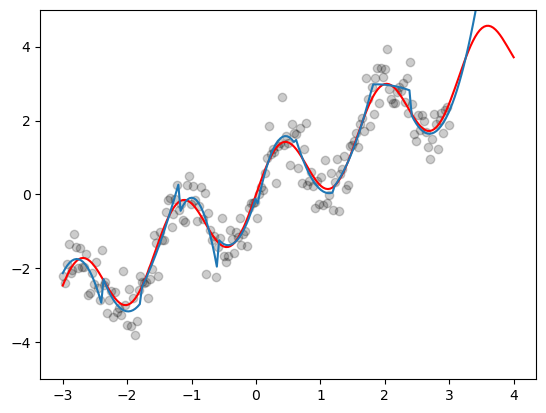

In [25]:
from sklearn.linear_model import LinearRegression
X, y = make_wave(n_samples=200)
X_orig, y_orig = make_sin(n_samples=200)

kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

X_combined = np.hstack([X, X*X, X_binned, X*X_binned, X*X*X_binned]) # Свяжем X и номер бина

reg = LinearRegression().fit(X_combined, y)

line = np.linspace(-3, 4, 200).reshape(-1,1)
line_binned = kb.transform(line)

line_combined = np.hstack([line,  line*line , line_binned, line* line_binned,  line* line* line_binned ])
line_pred = reg.predict(line_combined)



plt.plot(X[:, 0], y, 'o', c='k',alpha=.2 );
plt.plot(X_orig[:, 0], y_orig, c='r' );
plt.ylim(-5,5)
plt.plot(line, line_pred, label='g');

In [26]:
pd.DataFrame(X_combined)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-3.000000,9.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,-2.969849,8.820005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.820005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,-2.939698,8.641827,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.641827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,-2.909548,8.465468,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.465468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,-2.879397,8.290927,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.290927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.879397,8.290927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.290927
196,2.909548,8.465468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.465468
197,2.939698,8.641827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.641827
198,2.969849,8.820005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.820005


,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
0,1.0,-3.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-2.969849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-2.939698,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-2.909548,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,-2.879397,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,2.879397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,1.0,2.909548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,1.0,2.939698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,1.0,2.969849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


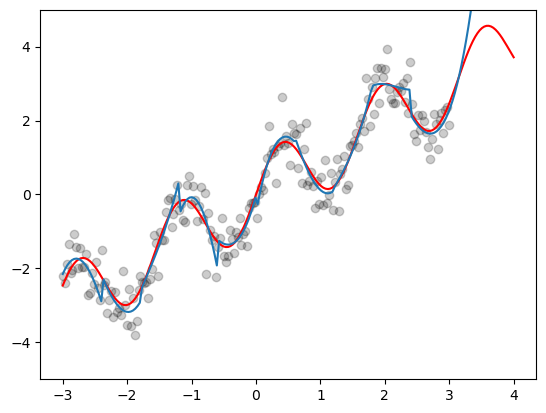

In [27]:
# Все тоже но пропишем фичинг для бинов

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X, y = make_wave(n_samples=200)
X_orig, y_orig = make_sin(n_samples=200)

kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
poly = PolynomialFeatures(3)
X_combined = poly.fit_transform( np.hstack([X, X_binned] ) )
reg = LinearRegression().fit(X_combined, y)


line = np.linspace(-3, 4, 200).reshape(-1,1)
line_binned = kb.transform(line)
line_combined = poly.fit_transform( np.hstack([line, line_binned] ) )

line_pred = reg.predict(line_combined)



plt.plot(X[:, 0], y, 'o', c='k',alpha=.2 );
plt.plot(X_orig[:, 0], y_orig, c='r' );
plt.ylim(-5,5)
plt.plot(line, line_pred, label='g');
X_combined.shape
pd.DataFrame(X_combined)

### А зачем вообще городить огород?
Кстати а почему просто не сделать фичинг, без бинов. А вот почему

(200, 4)

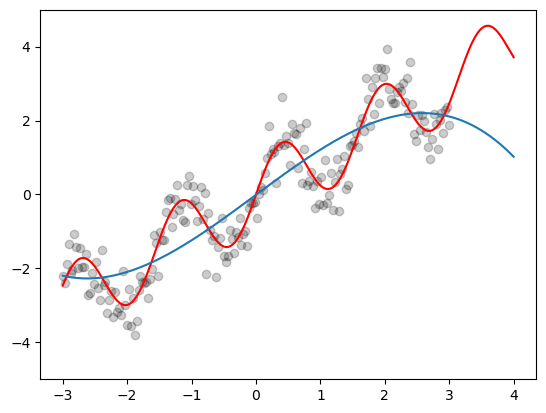

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X, y = make_wave(n_samples=200)
X_orig, y_orig = make_sin(n_samples=200)


poly = PolynomialFeatures(3)
X_combined = poly.fit_transform( X )
reg = LinearRegression().fit(X_combined, y)


line = np.linspace(-3, 4, 200).reshape(-1,1)
line_combined = poly.fit_transform( line )

line_pred = reg.predict(line_combined)


plt.plot(X[:, 0], y, 'o', c='k',alpha=.2 );
plt.plot(X_orig[:, 0], y_orig, c='r' );
plt.ylim(-5,5)
plt.plot(line, line_pred, label='g');
X_combined.shape

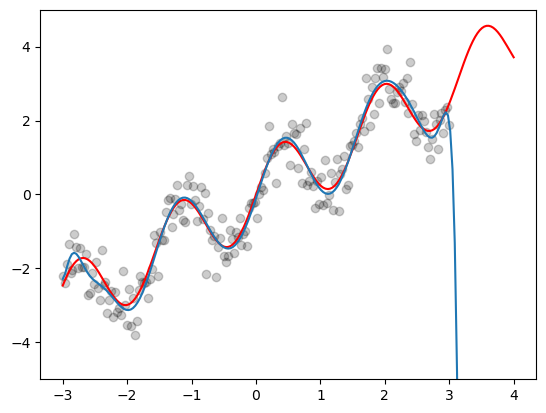

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X, y = make_wave(n_samples=200)
X_orig, y_orig = make_sin(n_samples=200)


poly = PolynomialFeatures(19)
X_combined = poly.fit_transform( X )
reg = LinearRegression().fit(X_combined, y)


line = np.linspace(-3, 4, 200).reshape(-1,1)
line_combined = poly.fit_transform( line )

line_pred = reg.predict(line_combined)


plt.plot(X[:, 0], y, 'o', c='k',alpha=.2 );
plt.plot(X_orig[:, 0], y_orig, c='r' );
plt.ylim(-5,5)
plt.plot(line, line_pred, label='g');

### Финал  
Ridge в бинах

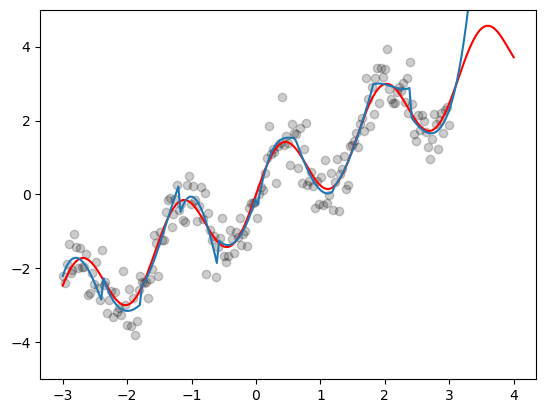

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

X, y = make_wave(n_samples=200)
X_orig, y_orig = make_sin(n_samples=200)

kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
poly = PolynomialFeatures(5)
X_combined = poly.fit_transform( np.hstack([X, X_binned] ) )
reg = Ridge(alpha=0.001).fit(X_combined, y)


line = np.linspace(-3, 4, 200).reshape(-1,1)
line_binned = kb.transform(line)
line_combined = poly.fit_transform( np.hstack([line, line_binned] ) )

line_pred = reg.predict(line_combined)



plt.plot(X[:, 0], y, 'o', c='k',alpha=.2 );
plt.plot(X_orig[:, 0], y_orig, c='r' );
plt.ylim(-5,5)
plt.plot(line, line_pred, label='g');